<h1 align='center' style='color:purple'>Clustering With Agenes standard deviation method</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import math
import pylab as pl
import sys

In [3]:
df = pd.read_csv('data/ro_freq_sd.csv')
df.head()

,chip,chipinstance,sd_freq,label
0,Chip1,C1I1,17.361956,0
1,Chip1,C1I2,16.164158,1
2,Chip1,C1I3,15.573616,1
3,Chip1,C1I4,15.307514,1
4,Chip1,C1I5,15.079042,1


In [4]:
df['freq'] = df['sd_freq']
del df['sd_freq']
print(df)


       chip chipinstance  label       freq
0     Chip1         C1I1      0  17.361956
1     Chip1         C1I2      1  16.164158
2     Chip1         C1I3      1  15.573616
3     Chip1         C1I4      1  15.307514
4     Chip1         C1I5      1  15.079042
..      ...          ...    ...        ...
795  Chip32       C32I21      1  13.473585
796  Chip32       C32I22      1  13.118594
797  Chip32       C32I23      1  12.648715
798  Chip32       C32I24      1  12.617349
799  Chip32       C32I25      0  16.564722

[800 rows x 4 columns]


In [5]:
print(len(df))

800


In [6]:
dataset = [(float(df['freq'][i]), float(df['freq'][i+1])) for i in range(0, len(df)-1, 2)]
# dataset = [(float(x[i]), float(x[i+1])) for i in range(1, len(x)-1, 3)]

print(dataset)


[(17.361955535019668, 16.164157880941406), (15.573615508288375, 15.30751449452197), (15.0790417467424, 14.570861333497067), (14.299562930383578, 13.950985628262972), (15.39017543759654, 16.793376670580578), (16.564721549123604, 16.059887919907787), (16.138695734166376, 15.966762351835763), (15.697133496278864, 15.508384828859514), (16.434643287884292, 15.79612294203866), (15.251803172084276, 14.586294937371862), (13.980611574605735, 13.657873187286516), (13.127071265137548, 13.157507362718816), (17.241809649801844, 16.91973699559186), (15.900628918379295, 15.364895053335047), (14.97197381777032, 14.592806447013542), (14.275503493747603, 13.64697768738558), (13.67982090526042, 15.150907563575192), (16.348012111568803, 16.2184308735463), (15.99304536353224, 15.75690324905246), (15.628739552503902, 15.37888162383728), (15.268185877831066, 16.149303390549083), (15.41679279227687, 15.023232009125072), (14.415182967968184, 13.92120684423588), (13.490366933482578, 12.945172845505), (13.040609

In [7]:
#data is ready till here

In [8]:
def distance(x, y):
     return math.sqrt(math.pow(x[0]-y[0], 2)+math.pow(x[1]-y[1], 2)) 

In [9]:
def min_distance(Ci, Cj):
      return min(distance(i, j) for i in Ci for j in Cj)

In [10]:
def max_distance(Ci, Cj):
      return max(distance(i, j) for i in Ci for j in Cj)

In [11]:
def avg_distance(Ci, Cj):
      return sum(distance(i, j) for i in Ci for j in Cj)/(len(Ci)*len(Cj)) 

In [12]:
#calculate minimum distance between two clusters
def minimum(A):
    min = 1000
    a = 0; b = 0 
    for x in range(len(A)):
         for y in range(len(A[x])):
          if x != y and A[x][y] < min:
              min = A[x][y];a = x; b = y
    return (a, b, min) 

In [13]:
def AGNES(ds, distance, k):
    C = [];M = []
    for i in ds:
        Ci = []
        Ci.append(i)
        C.append(Ci)
    for i in C:
        Mi = []
        for j in C:
            Mi.append(distance(i, j))
        M.append(Mi)
    q = len(ds)
    
    while q > k:
        x, y, min = minimum(M)
        C[x].extend(C[y])
        C.remove(C[y])
        M = []
        for i in C:
            Mi = []
            for j in C:
                Mi.append(distance(i, j))
            M.append(Mi)
        q -= 1
    return C

In [14]:
#plot final clusters
def plot(C):
    color_Value = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coordinate_X = []    
        coordinate_Y = []    
        for j in range(len(C[i])):
            coordinate_X.append(C[i][j][0])
            coordinate_Y.append(C[i][j][1])
        pl.scatter(coordinate_X, coordinate_Y, marker='x', 
        color=color_Value[i%len(color_Value)], label=i)
# Suppose, i=0 i.e. 1st cluster from the cluster division C. Then, i%len(color_Value) will be equal to 0%7=0 so 1st color from the color_Values array i.e. ‘r’ (red) will be assigned to the first cluster in the visualization plot.
    pl.legend(loc='upper right')
    pl.show() 


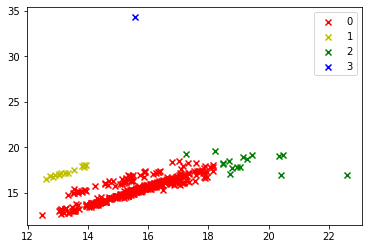

In [16]:
#With max_distance() used for distance computation and 4 clusters to be formed
C = AGNES(dataset, avg_distance, 4)
#Visualize the clusters
plot(C) 

In [17]:
print(C[0])

[(17.241809649801844, 16.91973699559186), (17.255651248214303, 16.882461313445972), (17.232454845436273, 16.872981360743573), (17.22955309925362, 16.810413439294106), (17.160346733093714, 16.984036622664235), (17.188368159892317, 16.93841787180845), (17.229045243425418, 16.981166037701886), (17.08537386187379, 16.965553336098413), (17.00933567191852, 16.979988221432897), (17.070954864916022, 17.177601695230916), (17.351656981395177, 17.094955396256523), (17.35965149419769, 17.17789276948718), (17.318126342072922, 17.1461365910808), (17.592043656153194, 16.98469899644972), (17.848179178840624, 16.748656662550584), (17.89126882029332, 16.637307474468336), (17.957658533338915, 16.695433507399564), (17.794100145834854, 17.398203930291203), (17.799929775142378, 17.454440695708357), (17.682759965570984, 17.417232845661797), (17.706495983113093, 17.382750070112614), (17.6322857281749, 17.37865069560926), (17.727309440521424, 17.31004043900533), (17.537103523672318, 17.364331256918597), (17.80

In [18]:
print(C[1])

[(13.040609648325498, 16.91382570561729), (12.919365309487924, 16.953391990985168), (12.851361795545252, 16.7236359682935), (12.752646784099374, 16.81896251259274), (12.617349166920915, 16.564721549123608), (13.032171729991896, 17.115417026762742), (13.10877568653915, 17.170250434982016), (13.226394066411302, 17.22316753678022), (13.327321561364087, 17.223748140285846), (13.533661736573736, 17.533895745098974), (13.944801898915602, 18.05373922488081), (13.878040207464457, 18.051038751274127), (13.794201680416306, 17.98638373881754), (13.885874117245914, 17.879317660358296)]


In [19]:
print(C[2])

[(17.2591280196886, 19.20618389998388), (18.225188613564477, 19.613197087675427), (18.496959209556582, 18.28216343871808), (18.49155212522735, 18.117877911057903), (18.676656553034324, 18.49648615278048), (19.043568468120668, 17.84537755274458), (18.954616851838495, 17.839772980618335), (18.78503393662092, 17.69230058528285), (18.70695057993151, 17.080324938361098), (20.4772434668341, 19.11589652618992), (20.32775196621604, 19.05931530774388), (19.432704392338184, 19.1988931972653), (19.144646771356207, 18.946701559902188), (19.281856757065693, 18.7187072203184), (20.393136100168604, 16.958699832239496), (22.58295817646572, 16.948156241904307)]


In [20]:
print(C[3])

[(15.547025438970634, 34.27269321194352)]
